# Functions to plot performance metrics

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [2]:
# Function to plot confusion matrix. This prevents notebooks from printing the plot twice.
def plot_confusion(t_class, p_class, title, cmap='turbo', report=True, **kwargs):

    # Define plot design
    title = title
    title_size = 'xx-large'
    label_size = 'large'
    tick_size = 'small'
    colors = cmap
    padding = 14

    if 'display_labels' in kwargs:
        d_labels = kwargs.get("display_labels")

    fig, ax = plt.subplots(figsize=(8,6))

    # plt.suptitle(title, fontsize = title_size)
    plt.title(title, fontsize = title_size, pad=padding * 1.25)
    plt.xticks(fontsize = tick_size)
    plt.yticks(fontsize = tick_size)
    plt.ylabel("True label", fontsize = label_size, labelpad=padding)
    plt.xlabel("Predicted label", fontsize = label_size, labelpad=padding)
    plt.subplots_adjust(bottom=0.35)

    if 'display_labels' in kwargs:
        d_labels = kwargs.get("display_labels")
        cm = ConfusionMatrixDisplay.from_predictions(t_class, p_class, cmap=colors, display_labels=d_labels)
        
        if report:
            # Make classification report
            classif_report = classification_report(t_class, p_class)
            print(classif_report)

    else:
        cm = ConfusionMatrixDisplay.from_predictions(t_class, p_class, cmap=colors)

    cm.plot(ax=ax, 
            xticks_rotation='vertical', 
            cmap=colors)
    
    plt.close()

    return fig


# Group iterations
def group_iterations(data):
    runs = []
    iterations = data['iteration'].unique()
    
    for i in iterations:
        run = data.loc[data['iteration'] == i]
        runs.append(run)

    num_iterations = len(iterations)

    return runs, num_iterations


# Function to plot metrics with multiple iterations
def plot_iterations(data, title, orientation="h", w=8, h=4):
    run, iterations = group_iterations(data)

    # Define metrics to plot
    loss = 'val_loss'
    accuracy = 'val_accuracy'

    # Plot results
    if orientation == "v":
        n_rows, n_cols = 2, 1  
    else:
        n_rows, n_cols = 1, 2

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(w, h), layout='tight')

    for r in enumerate(run):
        iteration = r[0] + 1
        axs[0].plot(r[1]['epoch'], r[1][loss], label = f"Iteration {iteration}")
        axs[1].plot(r[1]['epoch'], r[1][accuracy], label = f"Iteration {iteration}")

    # Set titles
    plt.suptitle(title, fontsize=14)
    axs[0].set_title("Loss", fontsize=11)
    axs[1].set_title("Accuracy", fontsize=11)

    # Set labels
    axs[0].set_ylabel('val_loss')
    axs[1].set_ylabel('val_accuracy')
    axs[0].set_xlabel('Epoch')
    axs[1].set_xlabel('Epoch')
    
    plt.legend(loc='lower right')

    plt.show()


    # Function to plot metrics with multiple iterations
def plot_i3d(data, title, l, a, orientation="h", w=8, h=4):
    # Define metrics to plot
    loss = l
    accuracy = a

    # Plot results
    if orientation == "v":
        n_rows, n_cols = 2, 1  
    else:
        n_rows, n_cols = 1, 2

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(w, h), layout='tight')

    axs[0].plot(data['epoch'], data[loss], label = 'loss', color="blue")
    axs[1].plot(data['epoch'], data[accuracy], label = 'accuracy', color="green")

    # Set titles
    plt.suptitle(title, fontsize=13)
    axs[0].set_title("Loss", fontsize=11)
    axs[1].set_title("Accuracy", fontsize=11)

    # Set labels
    axs[0].set_ylabel(loss)
    axs[1].set_ylabel(accuracy)
    axs[0].set_xlabel('Epoch')
    axs[1].set_xlabel('Epoch')

    plt.show()

    return fig

## Subplots
Used to create one figure with subplots

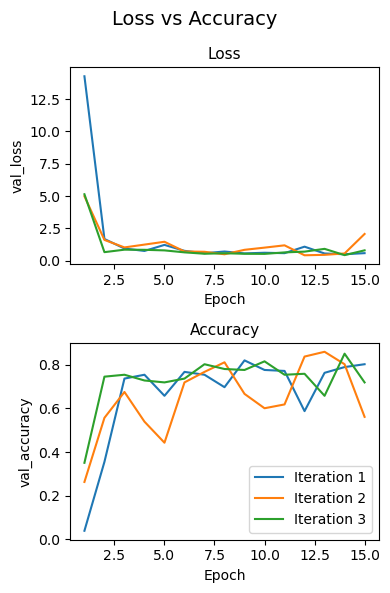

In [158]:
# Import data from CSV
data_csv = '../performance_data/train_perf/2024-11-19-conv3d-train-3layers.csv'
df = pd.read_csv(data_csv)

# Plot data
plot_iterations(df, "Loss vs Accuracy", orientation="v", w=4, h=6)

## Confusion matrix

                        precision    recall  f1-score   support

Asleep-Trying to sleep       0.78      0.39      0.52       583
          Doctor Visit       0.00      0.00      0.00        16
             EVS Visit       0.10      0.14      0.12        28
                Eating       0.00      0.00      0.00         1
                Family       1.00      0.72      0.84        92
          Lying In Bed       0.15      0.30      0.20        53
           Nurse Visit       0.16      0.15      0.15       163
 Sitting In Wheelchair       0.28      0.96      0.43        25
  Talking on the Phone       0.00      0.00      0.00        87
               Therapy       1.00      1.00      1.00         9
       Transfer To Bed       1.00      1.00      1.00         2
           Watching TV       0.05      0.17      0.08        47

              accuracy                           0.34      1106
             macro avg       0.38      0.40      0.36      1106
          weighted avg       0.54     

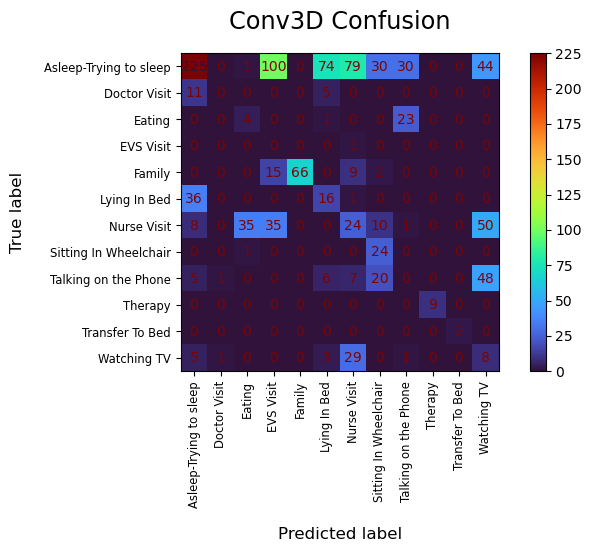

In [163]:
root = '../performance_data/test_perf'
data_csv = f'{root}/2024-11-18-12-58-19-conv3d-testing.csv'
df = pd.read_csv(data_csv)

cm = plot_confusion(t_class = df['Predicted class'], 
                    p_class = df['True class'],
                    display_labels = df['True class'].unique(), 
                    title = "Conv3D Confusion")

## I3D - Transfer learning

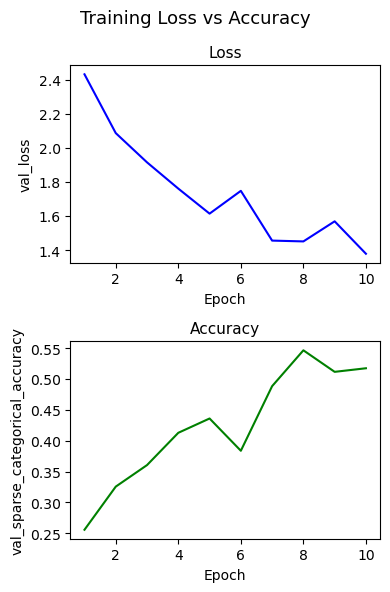

In [9]:
# Import data from CSV
dir = '../performance_data/train_perf'
data_csv = '2024-11-21-i3d_transfer-10-epochs-train.csv'
df = pd.read_csv(f'{dir}/{data_csv}')

# Plot data
f = plot_i3d(df, "Training Loss vs Accuracy", 
             l="val_loss",
             a="val_sparse_categorical_accuracy",
             orientation="v", w=4, h=6)

                        precision    recall  f1-score   support

Asleep-Trying to sleep       0.78      0.39      0.52       583
          Doctor Visit       0.00      0.00      0.00        16
             EVS Visit       0.10      0.14      0.12        28
                Eating       0.00      0.00      0.00         1
                Family       1.00      0.72      0.84        92
          Lying In Bed       0.15      0.30      0.20        53
           Nurse Visit       0.16      0.15      0.15       163
 Sitting In Wheelchair       0.28      0.96      0.43        25
  Talking on the Phone       0.00      0.00      0.00        87
               Therapy       1.00      1.00      1.00         9
       Transfer To Bed       1.00      1.00      1.00         2
           Watching TV       0.05      0.17      0.08        47

              accuracy                           0.34      1106
             macro avg       0.38      0.40      0.36      1106
          weighted avg       0.54     

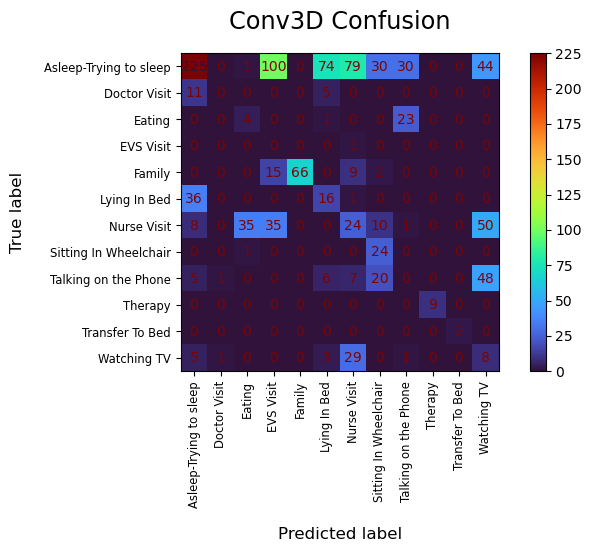

In [ ]:
root = '../performance_data/test_perf'
data_csv = f'{root}/2024-11-18-12-58-19-conv3d-testing.csv'
df = pd.read_csv(data_csv)

cm = plot_confusion(t_class = df['Predicted class'], 
                    p_class = df['True class'],
                    display_labels = df['True class'].unique(), 
                    title = "Conv3D Confusion")

/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

Asleep-Trying to sleep       0.97      0.27      0.42      1058
          Doctor Visit       0.50      0.02      0.04        48
             EVS Visit       0.00      0.00      0.00         0
                Eating       0.00      0.00      0.00         0
                Family       0.00      0.00      0.00         0
          Lying In Bed       0.00      0.00      0.00         0
           Nurse Visit       0.00      0.00      0.00         0
 Sitting In Wheelchair       0.00      0.00      0.00         0
  Talking on the Phone       0.00      0.00      0.00         0
               Therapy       0.00      0.00      0.00         0
       Transfer To Bed       0.00      0.00      0.00         0
           Watching TV       0.00      0.00      0.00         0

              accuracy                           0.25      1106
             macro avg       0.12      0.02      0.04      1106
          weighted avg       0.95     

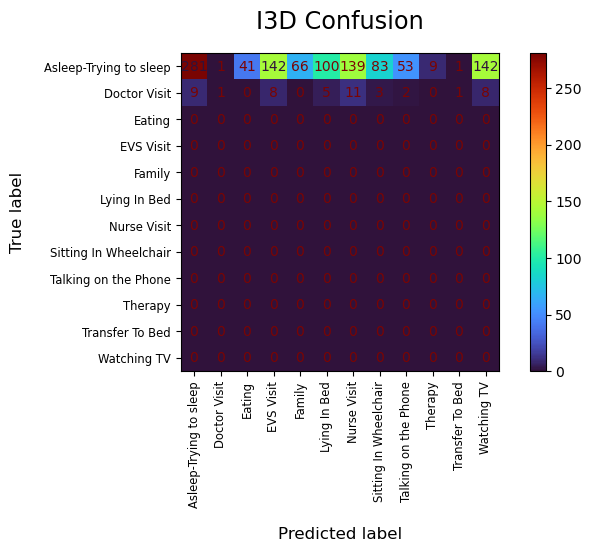

In [5]:
root = '../performance_data/test_perf'
data_csv = f'{root}/2024-11-21-05-26-56-i3d-transfer-test-all.csv'
df = pd.read_csv(data_csv)

cm = plot_confusion(t_class = df['Predicted class'], 
                    p_class = df['True class'],
                    display_labels = df['True class'].unique(), 
                    title = "I3D Confusion")

## Dataset

In [3]:
import os
# List files and ignore .DS_Store if on a Mac
def list_files(directory):
    visible_files = []
    for file in os.listdir(directory):
        if not file.startswith('.'):
            visible_files.append(file)

    return visible_files

In [4]:
def get_num_vids(path):
    classes = []
    num_vids = []

    train_fr = list_files(path)

    for dir in train_fr:
        cname = dir
        videos = list_files(f'{path}/{dir}')
        n = len(videos)
        classes.append(cname)
        num_vids.append(n)
    
    return classes, num_vids

In [28]:
import itertools

train_full_path = '../downloads/old_clips/full_res/test'
test_full_path = '../downloads/old_clips/full_res/train'
train_10s_path = '../downloads/fr_10s/train_fr_10s'
test_10s_path = '../downloads/fr_10s/test_fr_10s'

datasets = [train_full_path, test_full_path, train_10s_path, test_10s_path]

train_test = []
type_dataset = []
classes = []
num_vids = []

for d in enumerate(datasets):
    idx = d[0]
    path = d[1]
    cla, num = get_num_vids(path)
    classes.append(cla)
    num_vids.append(num)
    # print(cla, num)
    
    for n in num:
        if idx % 2 == 0: 
            train_test.append("Train")
        else:
            train_test.append("Test")

        if idx >= 2:
            type_dataset.append("10s")
        else:
            type_dataset.append("Full")

classes = list(itertools.chain.from_iterable(classes))
num_vids = list(itertools.chain.from_iterable(num_vids))

data = {"Train/Test":train_test, "Type": type_dataset, "Classes": classes, "Number of videos": num_vids}

dataset_info = pd.DataFrame(data)
data_csv = './dataset-info.csv'
dataset_info.to_csv(data_csv, index=False)
dataset_info.head()


,Train/Test,Type,Classes,Number of videos
0,Train,Full,EVS Visit,5
1,Train,Full,Sitting In Wheelchair,28
2,Train,Full,Doctor Visit,1
3,Train,Full,Talking on the Phone,17
4,Train,Full,Family,9


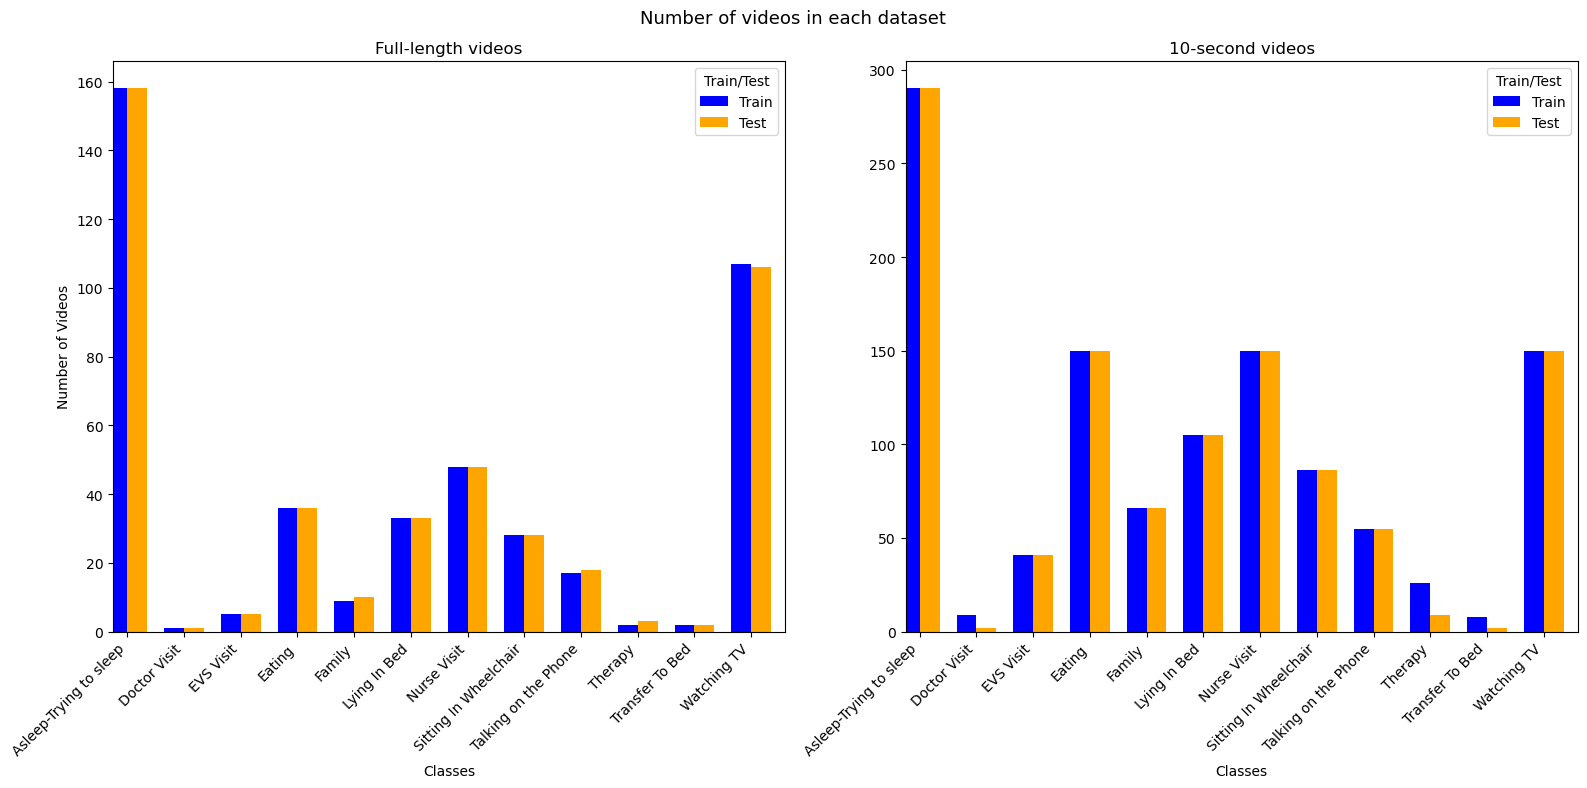

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pivot_df = df.pivot_table(index=['Classes'], columns=['Train/Test', 'Type'], values='Number of videos', aggfunc='sum')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

pivot_df['Train', 'Full'].plot(kind='bar', ax=axes[0], width=0.35, position=1, color='blue', label='Train')
pivot_df['Test', 'Full'].plot(kind='bar', ax=axes[0], width=0.35, position=0, color='orange', label='Test')
axes[0].set_title('Full-length videos')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Number of Videos')
axes[0].set_xticklabels(pivot_df.index, rotation=45, ha='right')
axes[0].legend(title='Train/Test')

pivot_df['Train', '10s'].plot(kind='bar', ax=axes[1], width=0.35, position=1, color='blue', label='Train')
pivot_df['Test', '10s'].plot(kind='bar', ax=axes[1], width=0.35, position=0, color='orange', label='Test')
axes[1].set_title('10-second videos')
axes[1].set_xlabel('Classes')
axes[1].set_xticklabels(pivot_df.index, rotation=45, ha='right')
axes[1].legend(title='Train/Test')

plt.suptitle("Number of videos in each dataset", fontsize=13)

plt.tight_layout()
plt.show()
